In [23]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

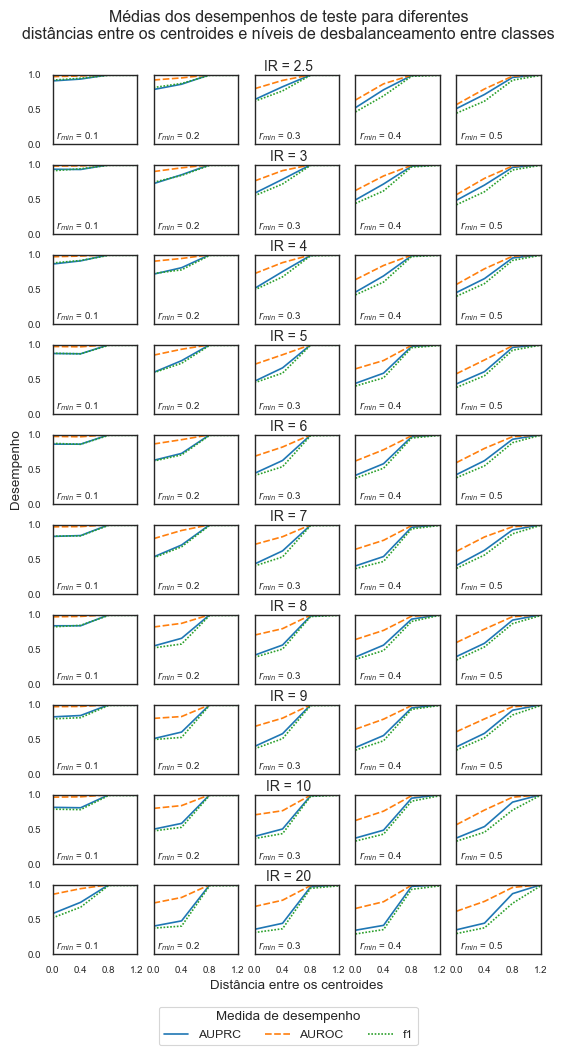

In [80]:
RESULTS_PATH = 'results/'
class_ratios = [
    '1to2.5', '1to3', '1to4', '1to5', '1to6', '1to7', '1to8',  
    '1to9', '1to10', '1to20'
]
class_1_radius = [f'{i/10}, {i/10}' for i in range(1, 6, 1)]

distances = ['1_2', '0_8', '0_4', '0_0']

total_ratios = len(class_ratios)
total_radius = len(class_1_radius)

sns.set_style('white')
sns.set_context("paper", font_scale = 1)

fig = plt.figure(
    figsize=(6.29707, 9),
)

fig.suptitle(
    (
        'Médias dos desempenhos de teste para diferentes\n'
        'distâncias entre os centroides e níveis de desbalanceamento entre classes'
    ),
    y=1.06
)

subfigs = fig.subfigures(
    nrows=total_ratios,
    ncols=1,
)

for i_ratios, ratio in enumerate(class_ratios):
    ratio_str = ratio.split('to')[1]
    subfigs[i_ratios].suptitle(f'IR = {ratio_str}', y=1.05, fontsize=10)
    axs = subfigs[i_ratios].subplots(
        nrows=1,
        ncols=total_radius,
    )

    for i_radius, radius in enumerate(class_1_radius):
        radius_str = radius[:3]
        radius_filename = radius_str.replace('.', '_')
        
        plot_df = pd.DataFrame()
        for distance in distances:
            distance_str = distance.replace('_', '.')

            df = pd.read_csv(
                f'results/spheres-2d-samples=300-radius={radius_filename}-ratio={ratio}-distance={distance}/score_summary.txt',
                sep='\t'
            )
            mean_test_AUPRC_score = df.loc[
                :,
                'mean_test_AUPRC_score'
            ].mean()
            mean_test_AUROC_score = df.loc[
                :,
                'mean_test_AUROC_score'
            ].mean()
            mean_test_f1_score = df.loc[
                :,
                'mean_test_f1_score'
            ].mean()

            plot_df = pd.concat(
                [
                    plot_df,
                    pd.DataFrame(
                        {
                            'AUPRC': mean_test_AUPRC_score,
                            'AUROC': mean_test_AUROC_score,
                            'f1': mean_test_f1_score
                        }, index=[float(distance_str)]
                    )
                ]
            )

        lineplt = sns.lineplot(
            plot_df,
            legend=True,
            ax=axs[i_radius],
        )
        axs[i_radius].set_xlim(0, 1.2)
        axs[i_radius].set_ylim(0, 1)

        axs[i_radius].set(xlabel=None, ylabel=None)
        axs[i_radius].text(0.05, 0.07, f'$r_{{min}}$ = {radius_str}', fontsize=7)                

        axs[i_radius].tick_params(axis='both', which='major', labelsize=7)

        if i_radius == 0:
            axs[i_radius].set_xticks([0, 0.5, 1])

        if i_radius == 0 and i_ratios == 4:
            axs[i_radius].set(ylabel='Desempenho')

        if i_radius != 0:
            axs[i_radius].set_yticks([])           

        if i_ratios == total_ratios - 1 and i_radius == 2:
            axs[i_radius].set(xlabel='Distância entre os centroides')  

        if i_ratios == total_ratios - 1:
            axs[i_radius].set_xticks([1.2, 0.8, 0.4, 0.0])
        
        if i_ratios != total_ratios - 1:
            axs[i_radius].set_xticks([])

        lineplt.get_legend().remove()
        if i_ratios == total_ratios - 1 and i_radius == total_radius - 1:
            lineplt.legend(title='Medida de desempenho', loc='lower center', bbox_to_anchor=(-2, -1.4), ncol=3)